In [ ]:
import numpy as np

def distance(x,y):
  return np.sqrt(np.sum(pow((x-y),2)))

In [ ]:
#the given initial centers and points
centers = np.array([[2, 4], [1, 7]])
points = np.array([[3, 5],[4, 6],[2, 8],[2, 3],[1, 4]])
q = 2
Lamda = 1

In [ ]:
def CalculateDistance(data, centers):
    #initializing Distances array with the same shape of nbr of rows of centers and nbr of rows of the datapoints
    #np.zeros to initalize it with zeros as a start
    Distances = np.zeros((data.shape[0], centers.shape[0]))
    for i in range(data.shape[0]):
        for j in range(centers.shape[0]):
            #i calculated the distance between the indexed point and each center using the given distance function and placed it in the 2d array
            Distances[i][j] = distance(data[i],centers[j])
    return Distances



print(CalculateDistance(points, centers))

[[1.41421356 2.82842712]
 [2.82842712 3.16227766]
 [4.         1.41421356]
 [1.         4.12310563]
 [1.         3.        ]]


In [ ]:
def CalculateMembership(Distances, q):
    #here the len(Distances) is the nbr of points and the length of the inner list len(Distances[0]) is the nbr of clusters
    #so i initialized a rnk array with these shapes
    num_points, num_clusters = Distances.shape
    rnk = np.zeros((len(Distances), len(Distances[0])))
    for i in range(len(Distances)):
        for j in range(len(Distances[0])):
            Y = 0
            for z in range(len(Distances[0])):
                #here i divide the distance between the point with cluster 1 Distances[i][j] on its distance with cluster 2 Distances[i][z] to get the membership
                #to the power of 2/q-1  then 1/ because thats the formula i found to calculate it
                Y += pow(float(Distances[i][j]/Distances[i][z]), 2/(q-1))
            rnk[i][j] = 1 / Y
    return rnk



print(CalculateMembership(CalculateDistance(points, centers), q))

[[0.8        0.2       ]
 [0.55555556 0.44444444]
 [0.11111111 0.88888889]
 [0.94444444 0.05555556]
 [0.9        0.1       ]]


In [ ]:
def UpdateClusterMean(datapoints, membership, q):
    points = datapoints.shape[0] #[0] because nbr of rows in datapoints is the same as the number of data points
    clusters = membership.shape[1] # [1] because nbr of columns in membership is = to the number of clusters
    updatedClusters = np.zeros((clusters, datapoints.shape[1])) #the i initialized the arr of updated clusters with the previous shapes

    for i in range(clusters):
        #those two variables to calculate the weighted avg in them
        X = np.zeros(datapoints.shape[1])
        Y = 0
        for j in range(points):
            #here i calculate the center as the weighted mean membership power q as weight
            #so we sum all the points * its membership power over the memberships
            X += (membership[j][i]**q) * datapoints[j]
            Y += (membership[j][i]**q)
        updatedClusters[i] = X / Y
    return updatedClusters


di=CalculateDistance(points, centers)
mem=CalculateMembership(di, q)
print(UpdateClusterMean(points, mem, q))

[[2.16796477 4.15572554]
 [2.4084223  7.45183867]]


In [ ]:
def CalculateObjectiveFunc(data, membership, centers, q, lamda):
  #we want to know here how well did we cluster the data so we calculate it using the formula
    Value = 0
    for i in range(data.shape[0]):
        for j in range(centers.shape[0]):
            #the membership of the indexed i point with each cluster power q * the distance between the i point with each cluster center to the power of 2
            Value += (membership[i][j] ** q) * (distance(data[i], centers[j]) ** 2)*lamda
    return Value

d=CalculateDistance(points, centers)
memberships =CalculateMembership(d, q)
CalculateObjectiveFunc(points, memberships, centers, 2, Lamda)

9.666666666666668

In [ ]:
def ReachConvergence(data, centers, q, lamda):
    distance = CalculateDistance(data, centers)
    membership = CalculateMembership(distance, q)
    objectice = CalculateObjectiveFunc(data, membership, centers, q, lamda)
    convergence = 0
    #while convergence = 0  means while there is still diffrence by every itration
    while (convergence==0):
        updatdCenters = UpdateClusterMean(data, membership, q)
        print(updatdCenters)
        distance = CalculateDistance(data, updatdCenters)
        updatedMembership = CalculateMembership(distance, q)
        updatedObjective = CalculateObjectiveFunc(data, updatedMembership, updatdCenters, q, lamda)
        if abs(objectice - updatedObjective) < 0.01: #if the absolute diff between the old obj func and the new is smaller than 0.01
                                                     #then there is no difference its finally convergence
            convergence = 1
        #if not then i calculate another obj func and we have new membership and centers and etc until converged
        objectice = updatedObjective
        membership = updatedMembership
        centers = updatdCenters
    return membership, centers

In [ ]:
membership, updated_centers = ReachConvergence(points, centers, q, Lamda)
print("membership : ", membership)
print("centers : ",updated_centers)



[[2.16796477 4.15572554]
 [2.4084223  7.45183867]]
[[2.06921193 4.05112114]
 [2.54436622 7.36051297]]
[[1.98927786 3.97484759]
 [2.64362838 7.24678759]]
[[1.92235408 3.91209102]
 [2.72719459 7.1378234 ]]
[[1.8650109  3.85939803]
 [2.79694907 7.03770285]]
[[1.8163385  3.81577537]
 [2.85376017 6.94846917]]
[[1.77610074 3.78073625]
 [2.89866873 6.87161493]]
[[1.74392523 3.75359918]
 [2.93311381 6.80782752]]
[[1.71904481 3.73331869]
 [2.95883257 6.75678624]]
[[1.70036649 3.71861393]
 [2.97762184 6.71728171]]
membership :  [[0.46963323 0.53036677]
 [0.12940992 0.87059008]
 [0.12373775 0.87626225]
 [0.96058636 0.03941364]
 [0.95198272 0.04801728]]
centers :  [[1.70036649 3.71861393]
 [2.97762184 6.71728171]]


14.061472476093476


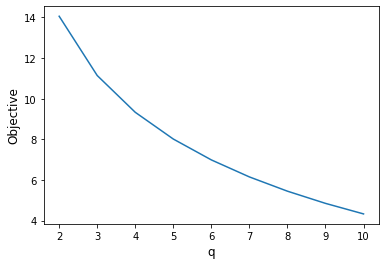

In [ ]:
#Bonus
import matplotlib.pyplot as plt

q2 = CalculateObjectiveFunc(points, membership, centers, 2, Lamda)
print(q2)
q3 = CalculateObjectiveFunc(points, membership, centers, 3, Lamda)
q4 = CalculateObjectiveFunc(points, membership, centers, 4, Lamda)
q5 = CalculateObjectiveFunc(points, membership, centers, 5, Lamda)
q6 = CalculateObjectiveFunc(points, membership, centers, 6, Lamda)
q7 = CalculateObjectiveFunc(points, membership, centers, 7, Lamda)
q8 = CalculateObjectiveFunc(points, membership, centers, 8, Lamda)
q9 = CalculateObjectiveFunc(points, membership, centers, 9, Lamda)
q10 = CalculateObjectiveFunc(points, membership, centers, 10, Lamda)

objective = [q2,q3,q4,q5,q6,q7,q8,q9,q10]
q = [2,3,4,5,6,7,8,9,10]


plt.plot(q, objective)
plt.xlabel("q", size=12)
plt.ylabel("Objective", size=12)
plt.show()

#The lower the objective function the closer the data points are to their respective cluster centers
#and clusters are better seperated so the best q value is 10